In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
df = pd.read_csv("smaller_adult.csv")
df

,age,workclass,educational-num,occupation,gender,hours-per-week,income
0,25,Private,7,Machine-op-inspct,Male,40,<=50K
1,38,Private,9,Farming-fishing,Male,50,<=50K
2,28,Local-gov,12,Protective-serv,Male,40,>50K
3,44,Private,10,Machine-op-inspct,Male,40,>50K
4,18,?,10,?,Female,30,<=50K
...,...,...,...,...,...,...,...
3569,49,?,9,?,Female,40,<=50K
3570,29,Private,11,Prof-specialty,Male,40,>50K
3571,25,Private,9,Craft-repair,Male,50,<=50K
3572,47,Private,9,Exec-managerial,Female,50,>50K


In [3]:
df.replace('?',np.nan,inplace=True)
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

In [4]:
X=df[['age','workclass','educational-num','occupation','gender',
       'hours-per-week']]
y = LabelEncoder().fit_transform(df['income'])

In [5]:
X=pd.get_dummies(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,
                                    random_state=20)

In [6]:
clf = SVC(kernel="linear", gamma = 'auto')
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.7846750727449079


In [7]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:\n", cm)


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.94      0.87       777
           1       0.63      0.31      0.42       254

    accuracy                           0.78      1031
   macro avg       0.72      0.63      0.64      1031
weighted avg       0.76      0.78      0.76      1031


Confusion Matrix:
 [[730  47]
 [175  79]]


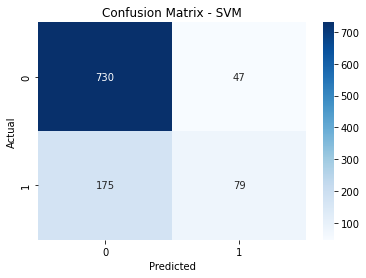

In [8]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()